# CoastSeg
**Notebook**: SDS_coastsat_classifier

**Purpose**: This notebook contains an interactive mapping dashboard that can be used to download satellite imagery from Google Earth Engine(GEE). 

**How it  Works**: Draw a bounding box along the coastline then click **Generate ROI*** which will create a series of Region of Interests(ROI) along the coastline. The map will check if there is a shoreline vector in the region where the bounding box was drawn then create a series of ROIs along the shoreline vector. Select a few ROIs on the map then click **Download Imagery**.

In [1]:
import os
# Local Imports
import coastseg
from coastseg import coastseg_map
from coastseg import coastseg_logs #must be the first module loaded to create logs folder

# External Imports
import ee
from google.auth import exceptions as google_auth_exceptions

# suppress tensorflow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

## Authenticate and Initialize with Google Earth Engine (GEE)

- Run this cell to initialize with GEE which will allow you to download remote sensing data from GEE.

### First Time Users

- In order to use Google Earth Engine (GEE) you will need to sign up to request access to use Google Earth Engine.https://signup.earthengine.google.com. You will only need to do this once and it takes only a day to get your account verified.

### How `ee.Authenticate()` works

- In order to initialize with GEE you will need an authorization token with is obtained by running `ee.Authenticate()`.This token lasts 7 days and during those 7 days you will not need to authenticate with google earth engine with an access code. Once the 7 days are up you will need to reauthenticate to use GEE again.


In [2]:
try:
    ee.Initialize()
except google_auth_exceptions.RefreshError as exception:
    print("Please authenticate with Google:\n")
    ee.Authenticate()
    ee.Initialize()

# How to Use The Map

---
1.  Click `Save Settings` Button
1. Use the rectangle tool to draw a bounding box along the coastline.
2. Click `Generate ROI` to create Regions of Interest (ROI) rectangles along the coastline within the bounding box. This may take some time.
3. Load transects into your bounding box with the `Load Transects` button. If any exist transects are exist within the bounding box on the map they will be loaded onto the map, however if none are found in the bounding box then none will load.
4. On the map click the ROIs you want to download.
5. Once you've selected all the ROIs you want to download click `Downlod Imagery`
 - Each downloaded ROI will have its own unique folder within the `data` directory.
6. To extract a timeseries of shorelines for the ROIs you downloaded click `Extract Shorelines`.
7. For each set of extracted shorelines you can compute the cross distances along the transects and shoreline by clicking `Compute Transects` and save the output to a json file in the roi directory.
8. You can convert the json file generated by `Compute Transects` to a csv by clicking `Save Transects CSV`.

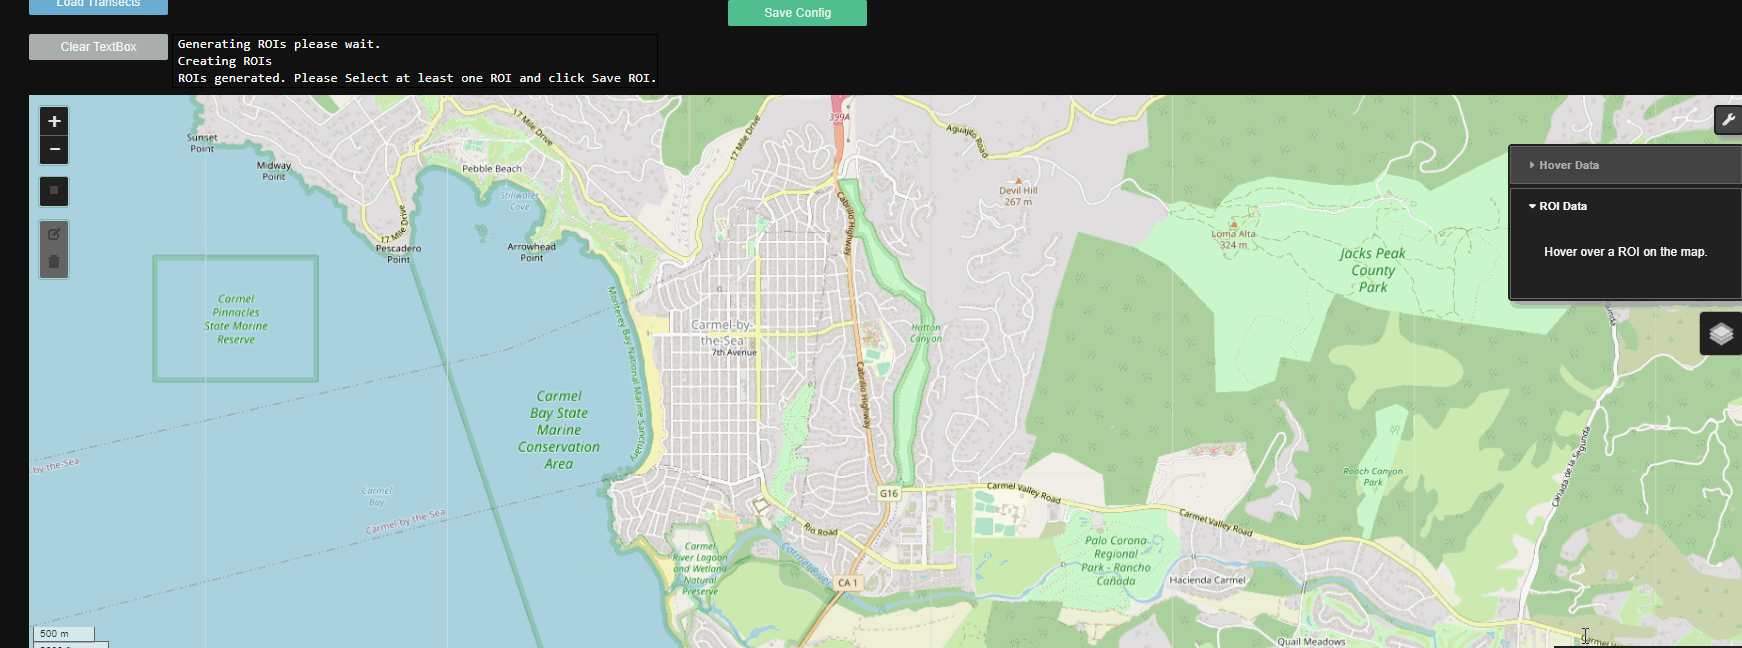

In [3]:
from coastseg.map_UI import UI
coastsegmap=coastseg_map.CoastSeg_Map()
coastseg_ui = UI(coastsegmap)
coastseg_ui.create_dashboard()

HBox()

HBox()